In [111]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [112]:
#Read input file and understand the data
# "default" is my dependent variable

In [113]:
import pandas as pd
ger_cre = pd.read_csv("german_credit.csv") 
ger_cre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [114]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [115]:
# Print Shape of model data
ger_cre.shape

(1000, 21)

In [116]:
ger_cre_cat = pd.get_dummies(ger_cre.select_dtypes(include=['object'])).join(ger_cre.select_dtypes(include=['int64']))
ger_cre_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_check_status_< 0 DM                                                   1000 non-null uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       1000 non-null uint8
account_check_status_no checking account                                      1000 non-null uint8
credit_history_all credits at this bank paid back duly                        1000 non-null uint8
credit_history_critical account/ other credits existing (not at this bank)    1000 non-null uint8
credit_history_delay in paying off in the past                                1000 non-null uint8
credit_history_existing credits paid back duly till now                       1000 non-null uint8
credit_history_no credits taken/ all credits paid back duly                   1000 non-null uint8
purpose_(vac

In [117]:
### Check for highly correlated variables but don't required any treatment for this use case

In [118]:
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ger_cre_cat.corr()
# The output shows considerable correlation between a variety of set of columns but ignoring the pairs which are taken from same
# original column, i.e. from
# -0.840546 between "other_installment_plans_bank" & "other_installment_plans_none"
# 0.779853 between "property_unknown / no property" & "housing_for free"
# -0.738036 between "personal_status_sex_female : divorced/separated/married" & "personal_status_sex_male : single"
# -0.735968 between "housing_own" & "housing_rent"
# -0.731408 between "other_debtors_guarantor" & "other_debtors_none"
# -0.683617 between "credit_history_critical account/ other credits existing (not at this bank)" & "credit_history_existing credits paid back duly till now"
# -0.652438 between "job_skilled employee / official" & "job_unskilled - resident"
# -0.645721 between "other_debtors_co-applicant" & "other_debtors_none"
# 0.624984 between "duration_in_month" & "credit_amount"
# 0.501364 between "credits_this_bank" & "credit_history_critical account/ other credits existing (not at this bank)"

#, we get effective correlation as 
# 0.779853 between "property_unknown / no property" & "housing_for free"
# 0.624984 between "duration_in_month" & "credit_amount"
# 0.501364 between "credits_this_bank" & "credit_history_critical account/ other credits existing (not at this bank)"


,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_.. >= 1000 DM,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_female : divorced/separated/married,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_if not A121 : building society savings agreement/ life insurance,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
account_check_status_0 <= ... < 200 DM,1.000000,-0.372670,-0.157296,-0.489136,0.019002,-0.118007,0.090174,0.015498,8.331786e-02,-4.656192e-03,0.105967,-0.015692,-0.049760,-0.001607,0.047382,0.078121,-0.056750,-0.025433,0.013826,0.011478,-0.047045,0.143136,-0.055198,-0.024652,-0.067731,0.082058,-0.029493,-0.004794,0.059118,0.012726,5.690901e-03,0.072188,-0.056240,-0.023075,0.101690,-0.061985,-0.039577,0.012891,-0.004300,0.034825,0.049600,-0.034576,-0.017507,-0.000378,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643
account_check_status_< 0 DM,-0.372670,1.000000,-0.159297,-0.495358,0.089054,-0.065430,-0.095859,0.066396,2.334108e-02,-7.201246e-03,-0.087712,0.073527,-0.016390,-0.113454,-0.015713,0.014661,0.130479,0.035253,-0.011063,-0.075014,0.246438,-0.119659,-0.085471,-0.122593,-0.017133,0.011122,-0.004197,-0.009912,0.037301,0.014834,3.394873e-02,-0.032643,-0.009695,0.065197,0.047987,-0.081198,0.087282,-0.080785,-0.036215,0.048476,0.012405,-0.017494,0.011886,0.067961,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.157296,-0.159297,1.000000,-0.209080,-0.001659,-0.004151,-0.036961,0.029770,-1.092189e-02,1.605211e-02,-0.015451,0.012230,-0.060785,0.058300,-0.038890,-0.028577,-0.004308,0.009223,-0.024711,-0.000462,0.025329,-0.020162,0.000525,-0.016275,0.010045,0.045414,0.014286,-0.043014,-0.049597,0.004183,5.382177e-02,-0.025576,-0.012603,-0.012101,-0.042192,0.040516,-0.025508,0.000734,0.029581,-0.008005,-0.009006,-0.002983,0.020206,0.015860,0.018934,-0.035183,-0.015346,-0.022932,0.073347,1.440549e-02,0.028955,-0.028955,0.036392,-0.036392,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700
account_check_status_no checking account,-0.489136,-0.495358,-0.

In [119]:
### Drop the original variables which are converted to dummy

In [120]:
# The dataframe "ger_cre_cat" already contains the dummy variables from the original categorical variables and it does not 
# contain the original variables/columns plus it contains the numeric columns

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [121]:
from sklearn.model_selection import train_test_split
Y = ger_cre_cat['default']

x_train,x_test,Y_train,Y_test=train_test_split(ger_cre_cat.drop(['default'],axis=1),Y,test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2, n_estimators = 500, criterion='entropy', random_state=9999)
rfcl = rfcl.fit(x_train,Y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [123]:
from sklearn import metrics
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test ,Y_test))
print(metrics.confusion_matrix(Y_test, y_predict))

0.77
[[202  15]
 [ 54  29]]


### Q6 Show the list of the features importance( 1 Marks)

                                                    IMPORTANCE
FEATURE                                                       
credit_amount                                            0.100
age                                                      0.080
duration_in_month                                        0.077
account_check_status_no checking account                 0.051
installment_as_income_perc                               0.035
present_res_since                                        0.034
account_check_status_< 0 DM                              0.033
credit_history_critical account/ other credits ...       0.021
savings_... < 100 DM                                     0.020
credits_this_bank                                        0.019
account_check_status_0 <= ... < 200 DM                   0.018
purpose_car (new)                                        0.017
job_skilled employee / official                          0.016
personal_status_sex_female : divorced/separated...     

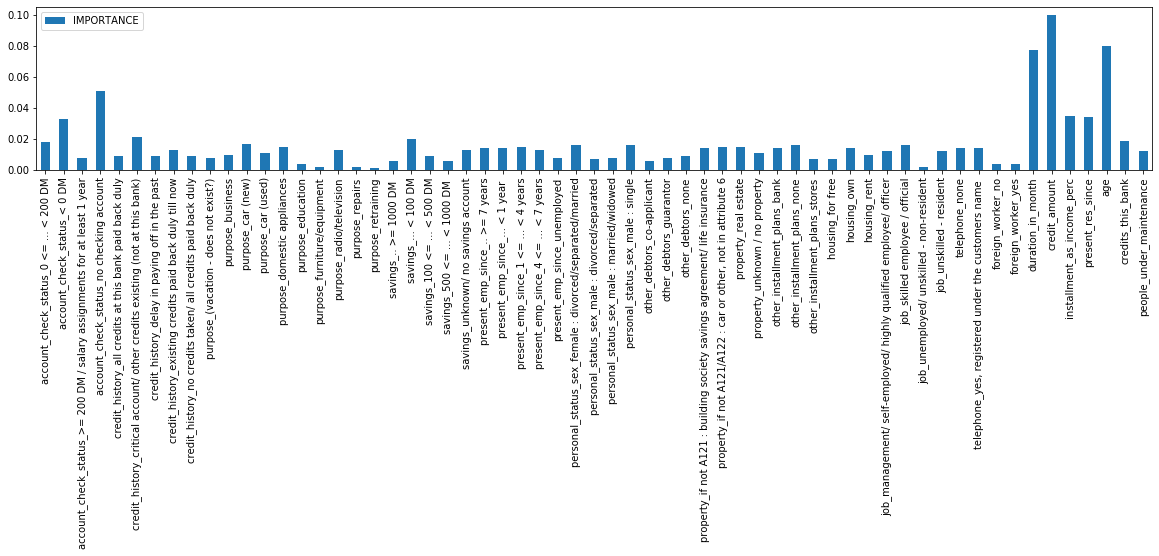

In [146]:
importances=pd.DataFrame({'FEATURE':ger_cre_cat.drop(['default'],axis=1).columns,'IMPORTANCE':np.round(rfcl.feature_importances_,3)})
importance=importances.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')

print(importance)
importances.set_index(ger_cre_cat.drop(['default'],axis=1).columns).plot(kind='bar' , stacked=False, figsize=(20, 3))

plt.show()


# ----------------------------- BELOW IS ANOTHER SOLUTION THROUGH EXTRATREESCLASSIFIER--------------------------------
#from sklearn.ensemble import ExtraTreesClassifier as ET  #extremely randomized tree classifier.

# feature extraction
# model = ET()
# model.fit(ger_cre_cat.drop(['default'],axis=1),Y)
# print(model.feature_importances_)

#feature_score =  [(item, score)
#                for item, score in zip(ger_cre_cat.drop(['default'],axis=1).columns, model.feature_importances_)]

#feature_score

# In the decreasing order of importance, the first fifteen columns are as
# duration_in_month -> 5.27%
# account_check_status_no checking account -> 5.26%
# credit_amount-> 4.80%
# account_check_status_< 0 DM  -> 3.92%
# age -> 3.38%
# installment_as_income_perc -> 2.96%
# present_res_since-> 2.91%
# credits_this_bank-> 2.43%
# other_installment_plans_none-> 2.12%
# purpose_car (new)-> 2.10%
# present_emp_since_.. >= 7 years-> 2.10%
# credit_history_critical account/ other credits existing (not at this bank)-> 2.08%
# personal_status_sex_male : single-> 2.06%
# credit_history_existing credits paid back duly till now-> 2.06%
# property_if not A121 : building society savings agreement/ life insurance-> 2.03%

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [126]:
# Use below values
num_folds = 10
seed = 77

In [127]:
#Validate the Random Forest model build above using k fold

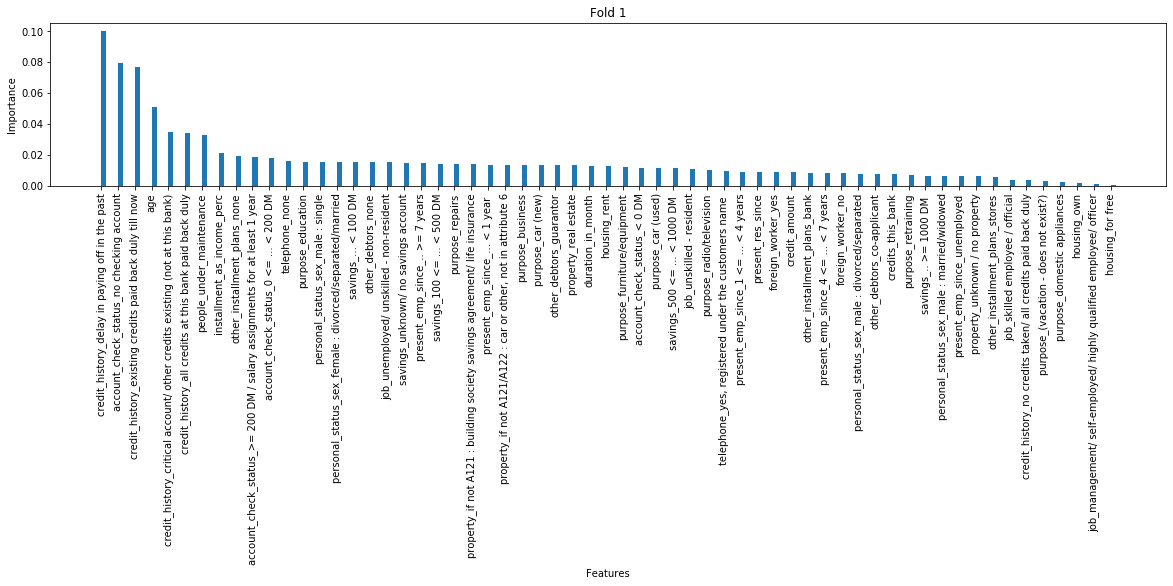

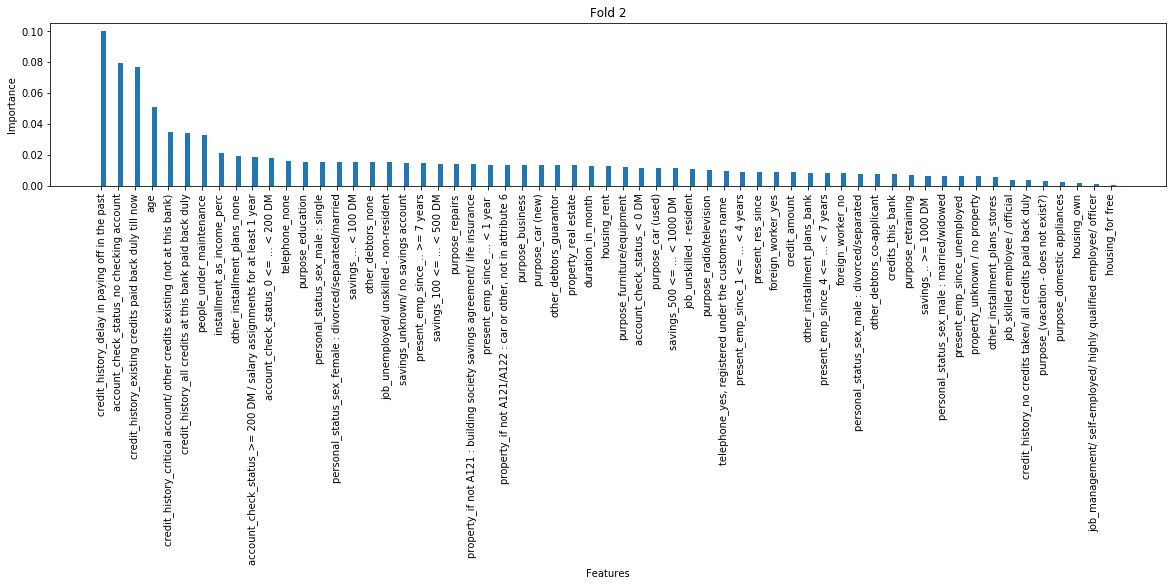

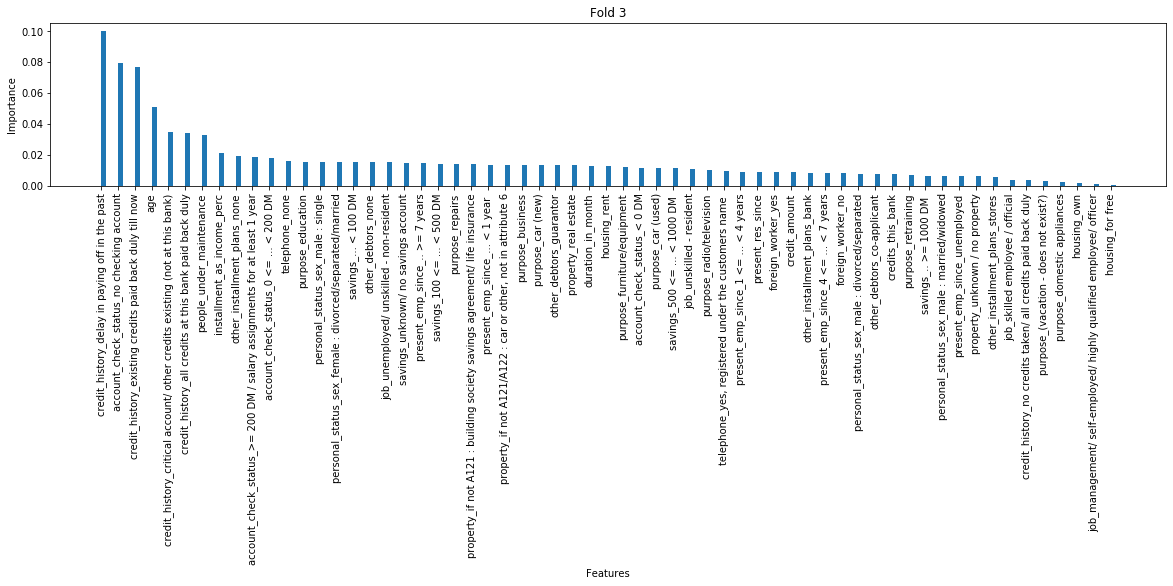

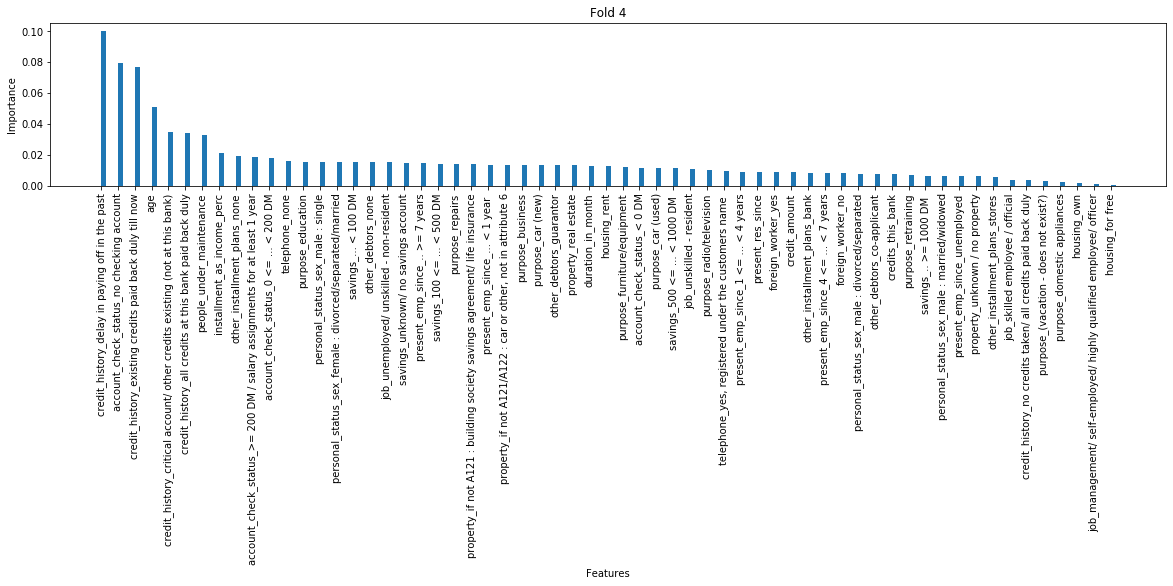

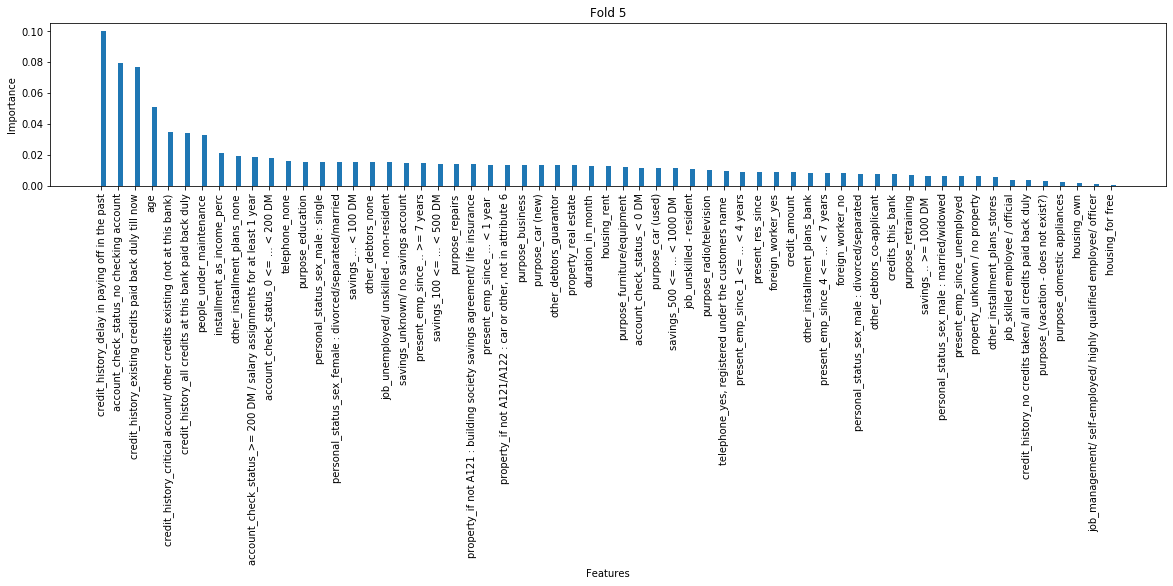

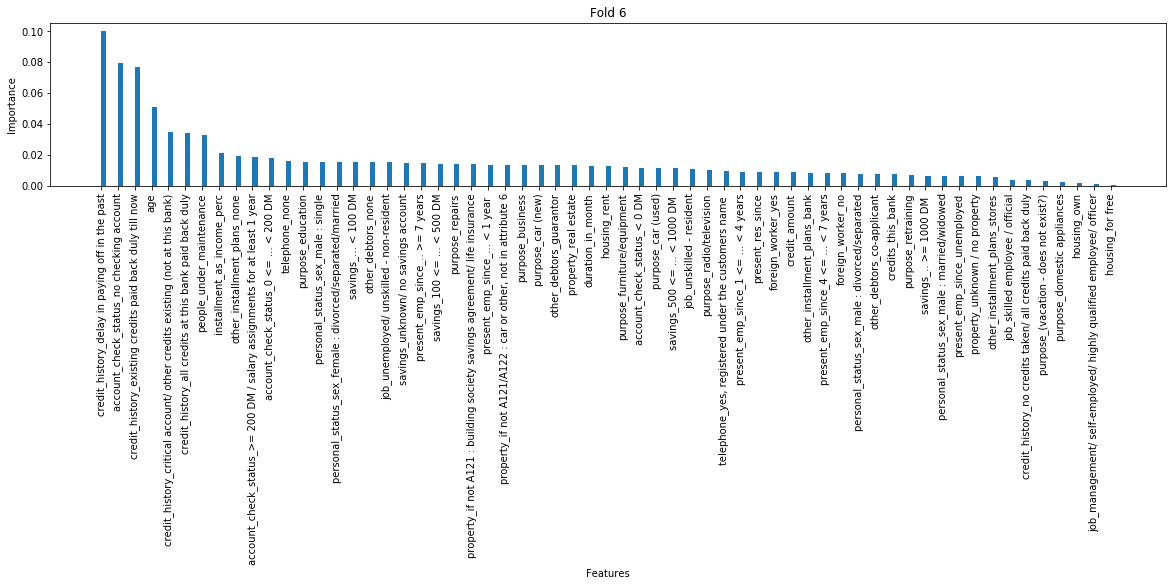

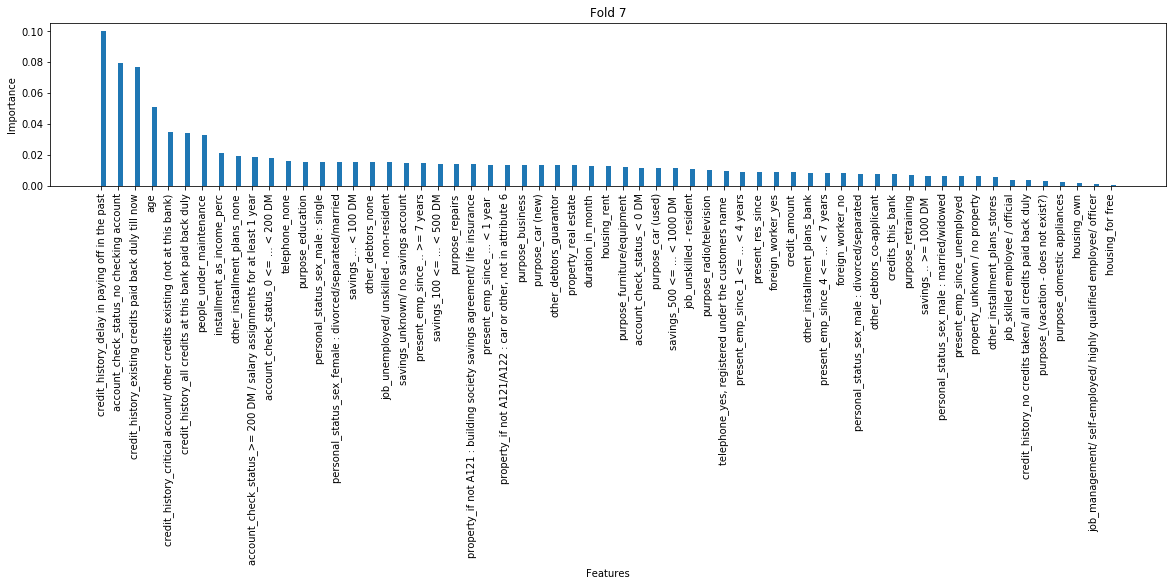

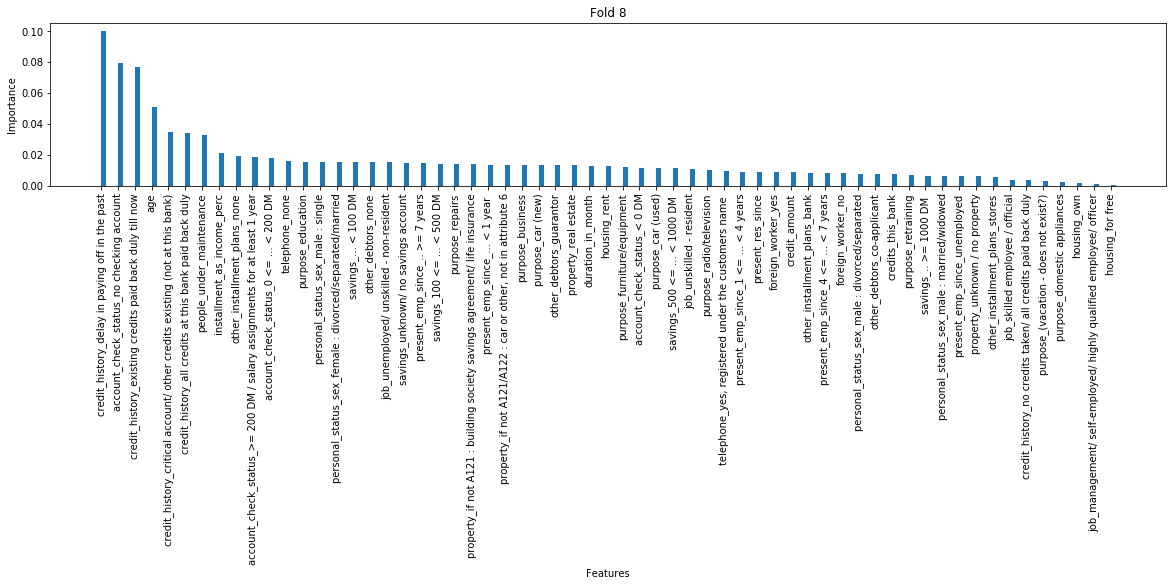

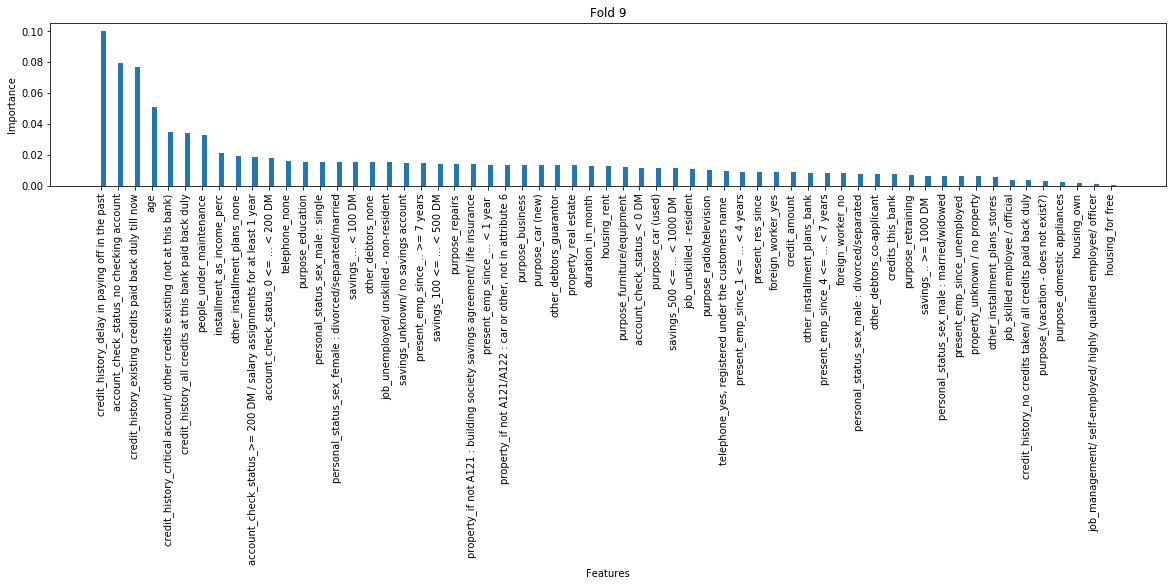

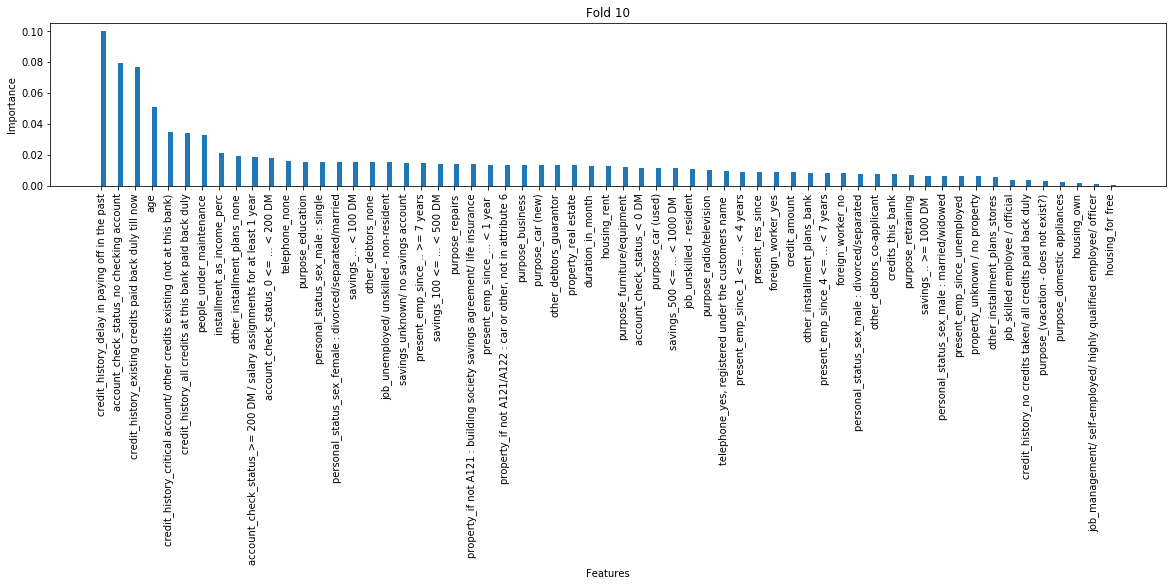

In [128]:
#from sklearn.datasets import make_classification

# classification dataset
#data_x, data_y = make_classification(n_features=9)

# feature names must be declared outside the function
feature_names = list(ger_cre_cat.drop(['default'],axis=1).columns)

kf = KFold(n_splits=10, random_state=77)
count = 1
# test data is not needed for fitting
for train, _ in kf.split(ger_cre_cat.drop(['default'],axis=1), ger_cre_cat['default']):
    rfcl.fit(ger_cre_cat.drop(['default'],axis=1), ger_cre_cat['default'])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rfcl.feature_importances_)[::-1]
    feature_labels = [feature_names[-i] for i in importances_index_desc]
    
    # plot
    plt.figure(figsize=(20, 3))  # width:20, height:3
    plt.bar(feature_labels, rfcl.feature_importances_[importances_index_desc], align='edge', width=0.3)
    plt.xticks(feature_labels, rotation='vertical')
    plt.ylabel('Importance')
    plt.xlabel('Features')
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

In [129]:
#Comparing the first fifteen important columns from K-fold cross validation as against the first fifteen important columns w.r.t
#RandomForests, we have 

#--------------As per the K-fold
# credit_history_delay in paying off in the past
# account_check_status_no checking account
# credit_history_existing credits paid back duly till now
# age
# credit_history_critical account/ other credits existing (not at this bank)
# credit_history_all credits at this bank paid back duly
# people_under_maintenance
# installment_as_income_perc
# other_installment_plans_none
# account_check_status_>= 200 DM / salary assignments for at least 1 year
# account_check_status_0 <= ... < 200 DM
# telephone_none
# purpose_education
# personal_status_sex_male : single
# personal_status_sex_female : divorced/separated/married
    
#--------------As per the RandomForests
# credit_amount                                            0.097
# age                                                      0.080
# duration_in_month                                        0.074
# account_check_status_no checking account                 0.048
# installment_as_income_perc                               0.038
# account_check_status_< 0 DM                              0.034
# present_res_since                                        0.034
# savings_... < 100 DM                                     0.021
# credits_this_bank                                        0.019
# purpose_car (new)                                        0.017
# job_skilled employee / official                          0.017
# account_check_status_0 <= ... < 200 DM                   0.017
# credit_history_critical account/ other credits ...       0.017
# personal_status_sex_male : single                        0.016
# property_real estate                                     0.016

In [130]:
#Calculate Mean score

In [131]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rfcl, ger_cre_cat.drop(['default'],axis=1), ger_cre_cat['default'], cv=10)
print("Cross-validated scores:", scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.81 0.71 0.73 0.78 0.78 0.74 0.74 0.81 0.74 0.78]
Average score: 0.7620000000000001


In [132]:
# Calculate score standard deviation using std()

In [133]:
print("Standard deviation:" , np.std(scores))
print("Standard deviation/Mean:" , np.std(scores)/np.average(scores))

Standard deviation: 0.03280243893371348
Standard deviation/Mean: 0.04304782012298356


# Q8 Print the confusion matrix( 1 Marks)

In [107]:
# Q8 Print the confusion matrix( 1 Marks)


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
